In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize
import seaborn as sns
import sklearn as skl
from sklearn.compose import ColumnTransformer

%matplotlib inline

#### Cargamos el dataset

In [140]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Boats_Cleaned_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

In [141]:
df.isna().sum()

Unnamed: 0            0
id                    0
type                  0
boatClass             0
make                  0
model                35
year                  0
condition             0
length_ft             0
beam_ft            6504
dryWeight_lb      11809
hullMaterial          0
fuelType           2952
numEngines            0
totalHP             848
maxEngineYear     16698
minEngineYear     16729
engineCategory    10493
price                 0
sellerId              0
city                 56
state                 0
zip                8688
created_date          0
created_month         0
created_year          0
dtype: int64

#### Eliminamos los outliers

In [142]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Outliers detectados
outliers = [140000000, 9999999999, 9999999999]

# Filtro el DataFrame para excluir los outliers
df_filtered = df[~df['price'].isin(outliers)]

#### Defino atributos numéricos y categóricos

In [143]:
num_attrs = ["year", "length_ft", "beam_ft", "dryWeight_lb", "numEngines", "totalHP"]
cat_attrs = ["type", "boatClass", "make", "condition", "hullMaterial", "fuelType", "engineCategory"]

##### Creo los pipelines para el preprocesamiento numérico y categórico

In [144]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

##### Combinación de pipelines con ColumnTransformer y aplicación del preprocesamiento de los datos

In [145]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attrs),
    ("cat", cat_pipeline, cat_attrs),
])

# Aplicar el preprocesamiento
preprocessed_dataset = full_pipeline.fit_transform(df_filtered)

#### Dividimos los datos

In [146]:
from sklearn.model_selection import train_test_split

label = df_filtered['price'].values

# Realizamos la partición de nuestro dataset en un conjunto de entrenamiento y otro de test (20%)
X_train, X_test, y_train, y_test = train_test_split(preprocessed_dataset, label, test_size=0.2, random_state=42)

#### Visualización de la relación de algunas varaibles independientes con precio

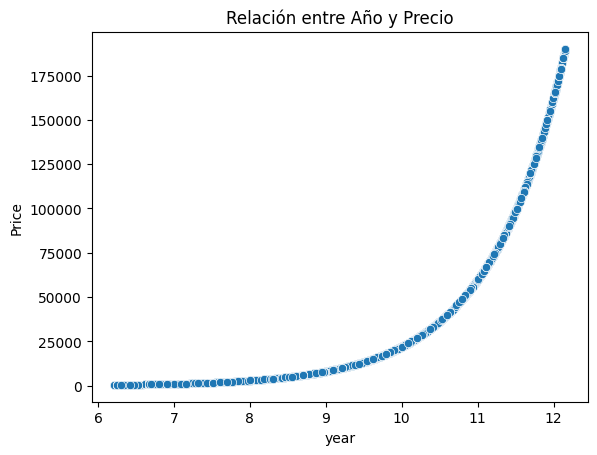

In [158]:
import seaborn as sns

sns.scatterplot(x='year', y='price', data=df_filtered)
plt.title('Relación entre Año y Precio')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

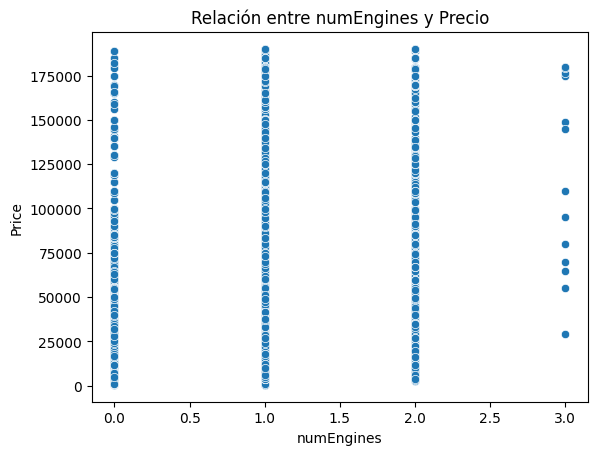

In [159]:
sns.scatterplot(x='numEngines', y='price', data=df_filtered)
plt.title('Relación entre numEngines y Precio')
plt.xlabel('numEngines')
plt.ylabel('Price')
plt.show()

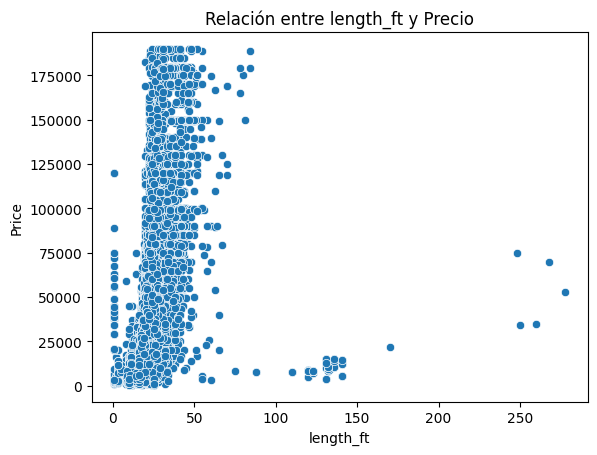

In [160]:
sns.scatterplot(x='length_ft', y='price', data=df_filtered)
plt.title('Relación entre length_ft y Precio')
plt.xlabel('length_ft')
plt.ylabel('Price')
plt.show()

#### Entrenamiento del modelo de regresión lineal múltiple

In [148]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

modelo = linear_model.LinearRegression()
x = X_train
y = y_train

modelo.fit(x,y)

LinearRegression()

#### Coeficientes del modelo

In [151]:
print('Coeficiente beta1: ', modelo.coef_, 'intercepto, modelo.intercept_')

Coeficiente beta1:  [ 38757.91497966  15854.67984906   1437.6527467  ... -10418.14602092
   3207.25245545   1245.2415729 ] intercepto, modelo.intercept_


##### Realizamos predicciones y evaluamos el modelo

In [153]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 264464328105848.9
R^2: -0.0002435500855539896
